In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/raw/realistic_linear_regression_dataset.csv')

In [2]:
df.head()

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductCategory      2000 non-null   object 
 1   Region               2000 non-null   object 
 2   CustomerSegment      2000 non-null   object 
 3   IsPromotionApplied   2000 non-null   object 
 4   ProductionCost       2000 non-null   float64
 5   MarketingSpend       2000 non-null   float64
 6   SeasonalDemandIndex  2000 non-null   float64
 7   CompetitorPrice      2000 non-null   float64
 8   CustomerRating       2000 non-null   float64
 9   EconomicIndex        2000 non-null   float64
 10  StoreCount           2000 non-null   int64  
 11  SalesRevenue         2000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 187.6+ KB


In [4]:
df.describe()

,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,499.969606,201.273420,1.484039,299.586427,3.999551,100.220798,48.674500,2072.857450
std,98.840116,49.953760,0.503743,81.524787,0.497141,19.176983,28.940548,346.007903
min,129.120339,46.777157,-0.527025,46.020085,2.449741,36.004789,1.000000,1094.518587
25%,434.452593,167.001091,1.150430,241.267538,3.656696,87.297706,23.000000,1808.106571
50%,500.600031,201.052487,1.485411,301.346897,3.985916,99.951705,49.000000,2068.173855
75%,566.588504,235.146602,1.826129,355.093381,4.338487,112.597996,74.000000,2341.223175
max,865.770180,379.973339,3.046715,552.443030,5.550593,164.320403,99.000000,3115.114292


In [5]:
print(df.isnull().sum())
print(df.duplicated().sum())

ProductCategory        0
Region                 0
CustomerSegment        0
IsPromotionApplied     0
ProductionCost         0
MarketingSpend         0
SeasonalDemandIndex    0
CompetitorPrice        0
CustomerRating         0
EconomicIndex          0
StoreCount             0
SalesRevenue           0
dtype: int64
0


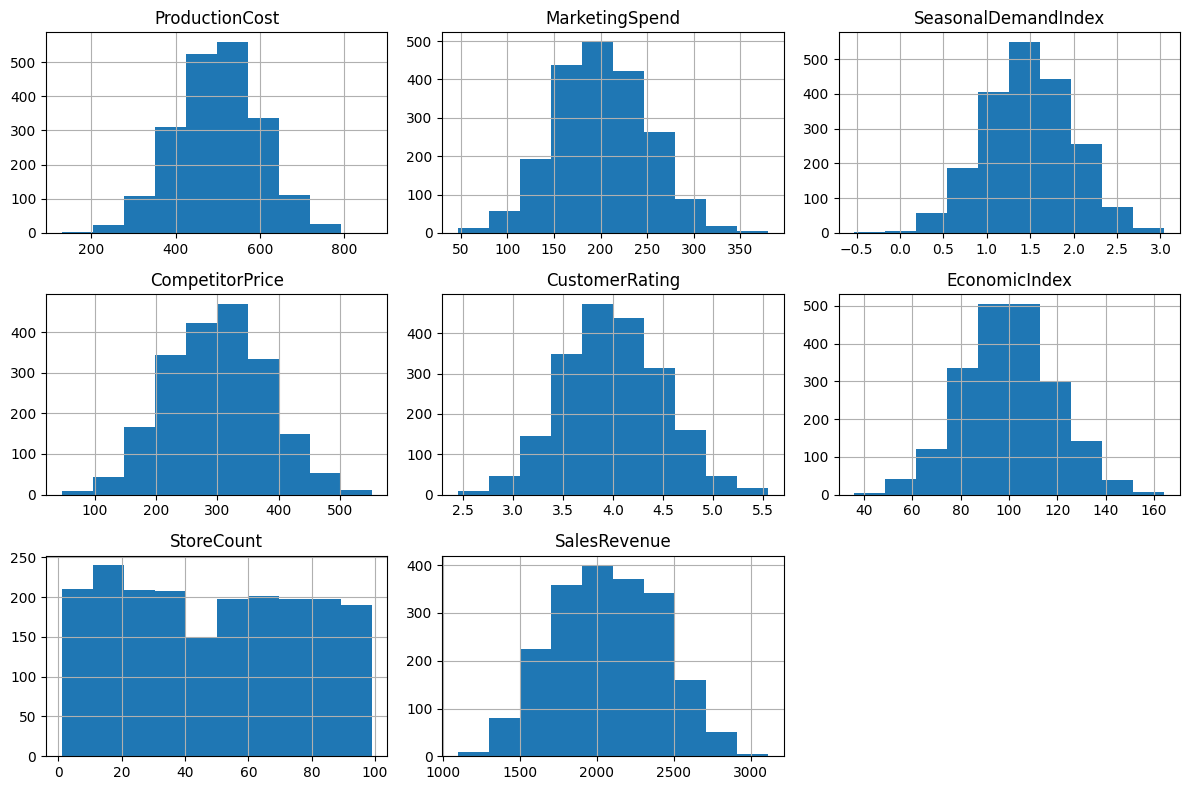

In [6]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [7]:
df.corr(numeric_only=True)

,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
ProductionCost,1.000000,0.022307,-0.025108,0.001394,0.006049,-0.037092,-0.007506,0.335911
MarketingSpend,0.022307,1.000000,-0.042863,-0.009633,0.012198,0.010059,0.016648,0.138905
SeasonalDemandIndex,-0.025108,-0.042863,1.000000,-0.006290,-0.022512,0.014998,0.012045,0.123253
CompetitorPrice,0.001394,-0.009633,-0.006290,1.000000,0.020117,-0.058152,0.017504,-0.106473
CustomerRating,0.006049,0.012198,-0.022512,0.020117,1.000000,0.007480,-0.011540,0.274562
EconomicIndex,-0.037092,0.010059,0.014998,-0.058152,0.007480,1.000000,-0.026465,-0.001938
StoreCount,-0.007506,0.016648,0.012045,0.017504,-0.011540,-0.026465,1.000000,0.823745
SalesRevenue,0.335911,0.138905,0.123253,-0.106473,0.274562,-0.001938,0.823745,1.000000


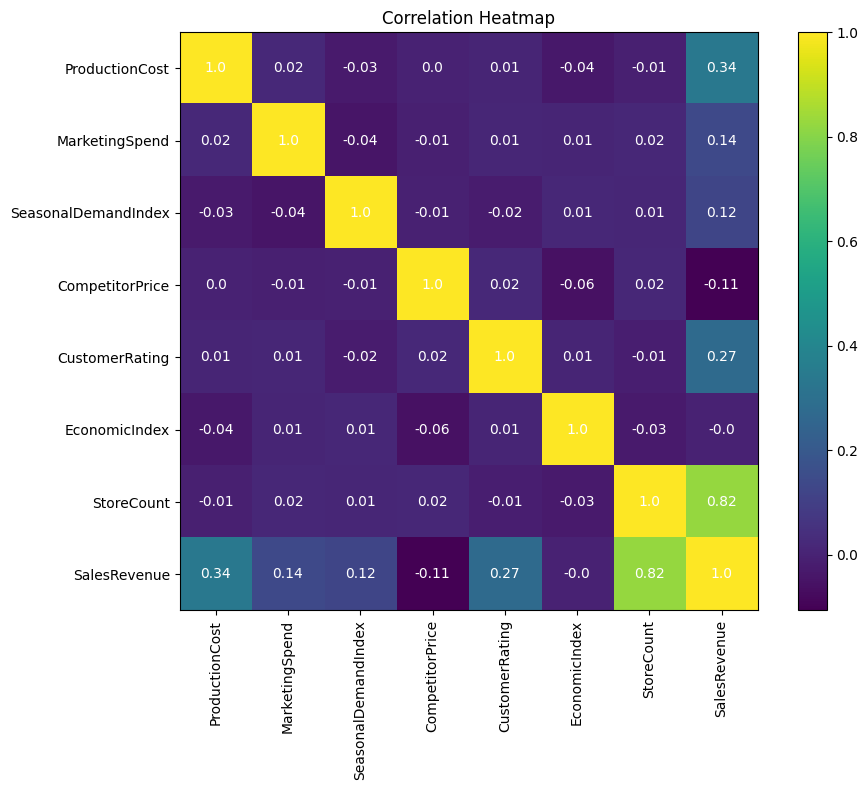

In [8]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='viridis', interpolation='nearest')
plt.colorbar()

# Etiquetas en ejes
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)

# Mostrar valores numéricos dentro de las celdas
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = round(corr.iloc[i, j], 2)
        plt.text(j, i, str(value), ha='center', va='center', color='white')

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

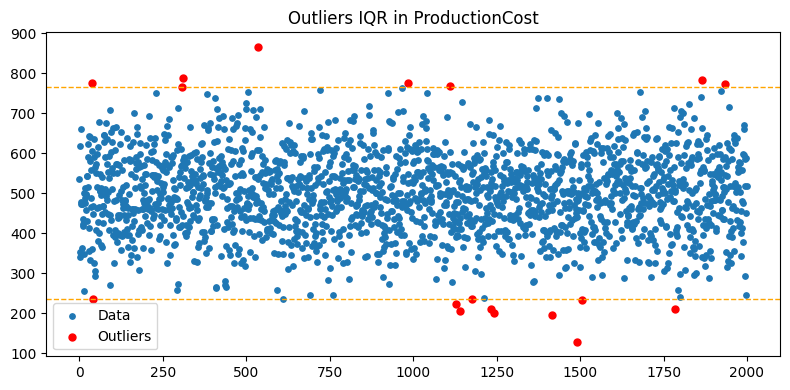

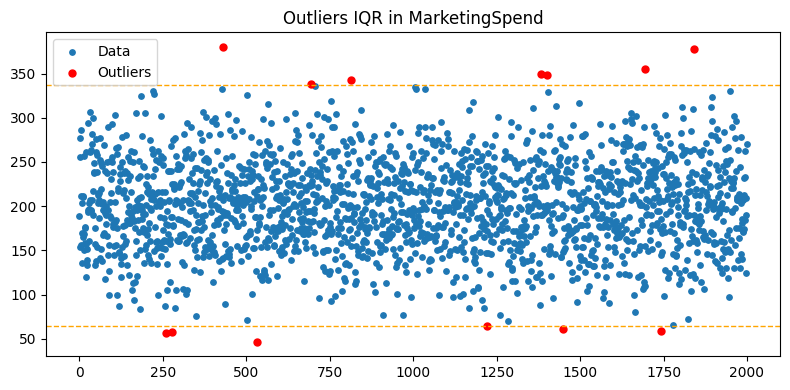

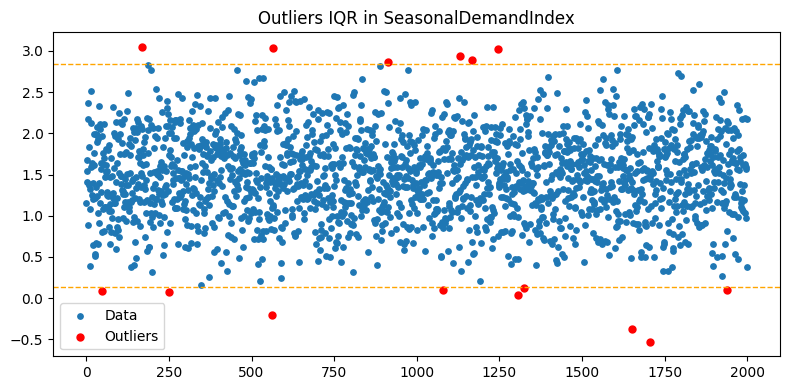

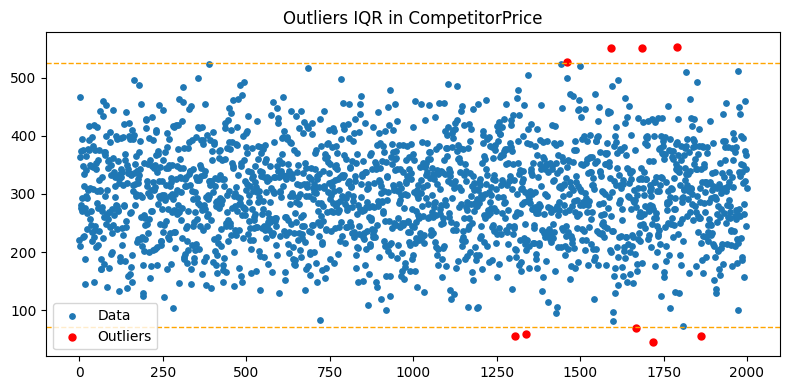

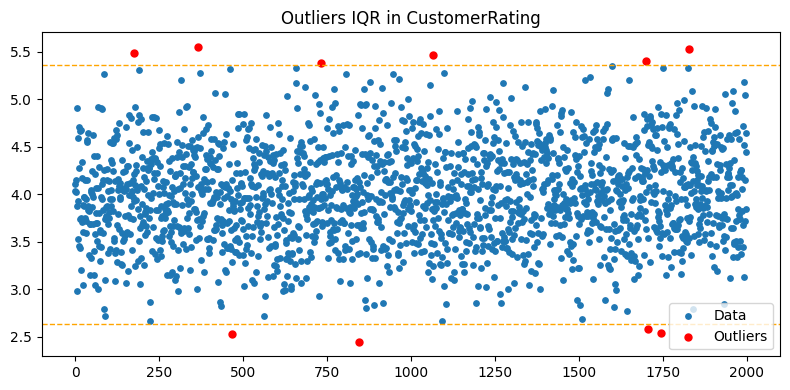

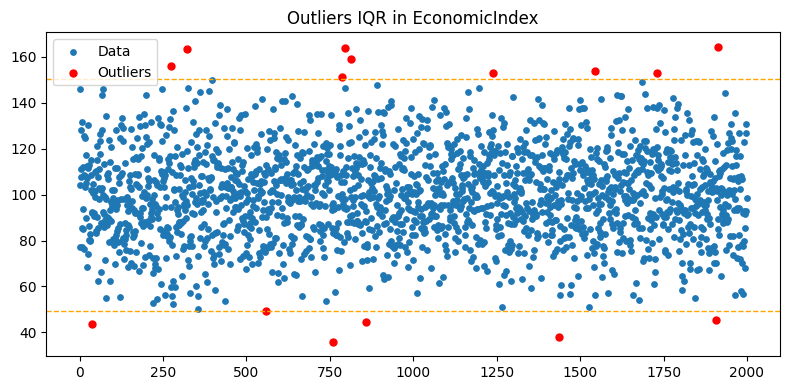

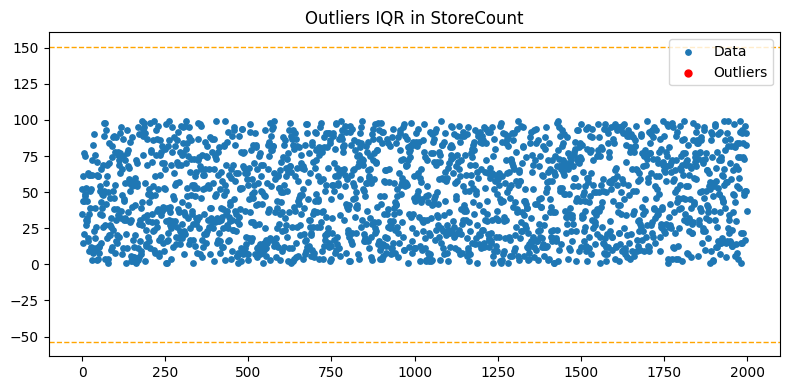

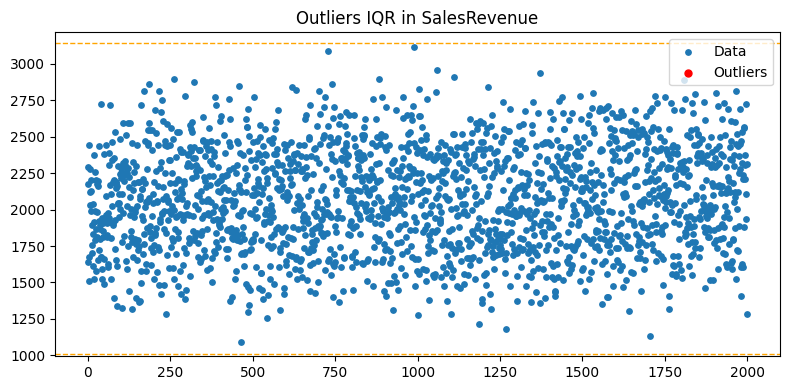

In [9]:
def plot_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float', 'int']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        plt.figure(figsize=(8, 4))
        plt.scatter(df.index, df[col], label="Data", s=15)
        plt.scatter(outliers.index, outliers, color="red", label="Outliers", s=25)
        plt.axhline(lower_bound, color='orange', linestyle='--', linewidth=1)
        plt.axhline(upper_bound, color='orange', linestyle='--', linewidth=1)
        plt.title(f"Outliers IQR in {col}")
        plt.legend()
        plt.tight_layout()
        plt.show()

plot_outliers_iqr(df)

In [10]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: ProductCategory
['Furniture' 'Toys' 'Electronics' 'Clothing']

Column: Region
['East' 'West' 'South' 'North']

Column: CustomerSegment
['High Income' 'Middle Income' 'Low Income']

Column: IsPromotionApplied
['Yes' 'No']


In [11]:
df_encoded = df.copy()

# Yes / Not for Promotion
df_encoded['IsPromotionApplied'] = df_encoded['IsPromotionApplied'].map({'Yes': 1, 'No': 0})

# One-Hot Encoding for categorical features
categorical_cols = ['ProductCategory', 'Region', 'CustomerSegment']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.astype(int)

df_encoded.head()

,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Toys,Region_North,Region_South,Region_West,CustomerSegment_Low Income,CustomerSegment_Middle Income
0,1,536,189,1,220,4,146,52,2293,0,1,0,0,0,0,0,0
1,0,352,255,1,467,4,104,35,1640,0,0,1,0,0,1,0,0
2,0,618,277,1,363,4,77,44,2173,1,0,0,0,1,0,0,0
3,1,339,153,1,209,4,128,15,1672,0,1,0,0,0,1,0,1
4,1,477,155,2,274,4,111,61,2443,0,1,0,0,0,1,0,1


In [12]:
X = df_encoded.drop(columns=["SalesRevenue"])
y = df["SalesRevenue"]

# Normalization
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()

X_scaled = scaler_x.fit_transform(X)

# Convertir de nuevo a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Dataset procesado final
df_processed = pd.concat([X_scaled_df, y], axis=1)

df_processed.head()

,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Toys,Region_North,Region_South,Region_West,CustomerSegment_Low Income,CustomerSegment_Middle Income,SalesRevenue
0,1.028403,0.369698,-0.235802,0.022636,-0.970258,0.88176,2.414633,0.114937,-0.596601,1.753089,-0.570422,-0.585819,-0.589668,-0.582739,-0.73622,-0.678911,2293.143707
1,-0.972381,-1.492378,1.085554,0.022636,2.059882,0.88176,0.223070,-0.472621,-0.596601,-0.570422,1.753089,-0.585819,-0.589668,1.716034,-0.73622,-0.678911,1640.454368
2,-0.972381,1.199536,1.526006,0.022636,0.784033,0.88176,-1.185792,-0.161561,1.676163,-0.570422,-0.570422,-0.585819,1.695868,-0.582739,-0.73622,-0.678911,2173.086023
3,1.028403,-1.623937,-0.956541,0.022636,-1.105204,0.88176,1.475392,-1.163866,-0.596601,1.753089,-0.570422,-0.585819,-0.589668,1.716034,-0.73622,1.472947,1672.608857
4,1.028403,-0.227381,-0.916500,1.763858,-0.307798,0.88176,0.588330,0.425997,-0.596601,1.753089,-0.570422,-0.585819,-0.589668,1.716034,-0.73622,1.472947,2443.222482


In [13]:
df_processed.to_csv('../../data/processed/SalesRevenueProcessed.csv', index=False)